# XMAGIX

- [1. Loading Library, Configuration Files and Other Stuff](#1.-Loading-Library,-Configuration-Files-and-Other-Stuff)
- [2. Starting System and Initializing Parameters](#2.-Starting-System-and-Initializing-Parameters)
- [3. Setting and Getting Parameters](#3.-Setting-and-Getting-Parameters)
  - [3.1. Get all currently set acquisition values.](#3.1.-Get-all-currently-set-acquisition-values.)
  - [3.2. Get available peaking times](#3.2.-Get-available-peaking-times)
  - [3.3. Setting Peaking Time, Bin Width and MCA-Channels](#3.3.-Setting-Peaking-Time,-Bin-Width-and-MCA-Channels)
  - [3.4. Setting Thresholds](#3.4.-Setting-Thresholds)
  - [3.5. Setting Gain](#3.5.-Setting-Gain)
- [4. Starting and Stopping a Run](#4.-Starting-and-Stopping-a-Run)
- [5. Pull Data and Plot](#5.-Pull-Data-and-Plot)

# 1. Loading Library, Configuration Files and Other Stuff
[&#x2B06;](#XMAGIX)

In [1]:
import os
from ctypes import *
import ipywidgets as widgets
from IPython.display import display
from IPython.core.display import SVG
from rich.jupyter import print
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg" # crisper plots
import numpy as np
import pandas as pd
# import lmfit as lm

from xmagix import XMagix
from thetube import Tube

tube = Tube()

cwd = os.getcwd()
xmagix = XMagix("lib/libhandel.so")
inifile = cwd + "/microdxp_usb2.ini"
configfile = cwd + "/config.ini"

HV set to 0. Ok.
Filament current set to 0uA -> 0. Ok.


[18:36:14] Library loaded successfully 😄                                                              ]8;id=982963;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=143974;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#30\30]8;;\

In [ ]:
#!~/klippy-env/bin/python ~/klipper/klippy/klippy.py ~/printer_data/config/printer.cfg -a /tmp/klippy_uds -l /tmp/klippy.log

# 2. Starting System and Initializing Parameters
[&#x2B06;](#XMAGIX)

Available Log Levels:
```
1:  MD_ERROR
2:  MD_WARNING
3:  MD_INFO
4:  MD_DEBUG
```

In [2]:
xmagix.setLogging(4)
xmagix.exit()
xmagix.init(inifile)
xmagix.startSystem()

[18:37:32] Logfile set to /tmp/xmagix.log                                                              ]8;id=436968;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=45860;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#69\69]8;;\

           Exiting...                                                                                  ]8;id=291690;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=260251;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

           Loading system...                                                                           ]8;id=570499;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=491525;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

[18:37:33] Starting system...                                                                          ]8;id=423345;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=946271;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

# 3. Setting and Getting Parameters
[&#x2B06;](#XMAGIX)

## 3.1. Get all currently set acquisition values.
[&#x2B06;](#XMAGIX)

In [3]:
values = xmagix.getAcquisitionValues(name="all")
values = pd.DataFrame(values.items(), columns=["Parameter", "Value"])
# print(values.sort_values(by=["Parameter"]))
print(values)

Parameter        Value
0                 parset     1.000000
1                 genset     0.000000
2                  fippi     0.000000
3            clock_speed    40.000000
4        energy_gap_time     0.300000
5      trigger_peak_time     0.050000
6       trigger_gap_time     0.300000
7        baseline_length   512.000000
8      trigger_threshold   150.000000
9     baseline_threshold   120.000000
10      energy_threshold     0.000000
11  peak_interval_offset     0.450000
12    peak_sample_offset     0.250000
13             max_width     0.400000
14             peak_mode     0.000000
15         peak_interval     0.450000
16           peak_sample     0.250000
17              polarity     1.000000
18          preamp_value     5.000000
19                  gain     3.382875
20             gain_trim     1.000000
21           preset_type     1.000000
22          preset_value    30.000000
23   number_mca_channels  8192.000000
24         mca_bin_width     1.000000
25         bytes_per_bin     3.000000
26        adc_trace_wait     0.025000
27    auto_adjust_offset     1.000000
28        number_of_scas     0.000000

In [ ]:
binfo = xmagix.getBoardInformation()
print(binfo)

glow, ghi, gexpo = binfo["Gain (mantissa low byte)"], binfo["Gain (mantissa high byte)"], binfo["Gain (exponent)"]
mantissa = ghi << 8 | glow
gain = (mantissa/32768)*2**gexpo
print(f"Gain: {gain}")

## 3.2. Get available peaking times
[&#x2B06;](#XMAGIX)

In [ ]:
ccurrentPeakingTimes = xmagix.getNumberOfPeakingTimes()
currentPeakingTimes = np.ctypeslib.as_array(ccurrentPeakingTimes)

## 3.3. Setting Peaking Time, Bin Width and MCA-Channels
[&#x2B06;](#XMAGIX)

In [ ]:
idict = {"manual": True, "manual_name":"Set"}
pt = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("parset"), value=widgets.Dropdown(options=currentPeakingTimes.round(2).tolist(), value=2.4, description="Peaking Time"))
bw = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("mca_bin_width"), value=widgets.FloatText(value=1, description="Bin Width"))
nMCA = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("number_mca_channels"), value=widgets.FloatText(value=8192, description="No. MCA"))
ui1 = widgets.HBox([pt, bw, nMCA])
ui1

## 3.4. Setting Thresholds
[&#x2B06;](#XMAGIX)

* Trigger: 0-4095
* Baseline: 0-4095
* Energy: 0-4095

In [ ]:
th_trigger = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("trigger_threshold"), value=widgets.FloatText(value=150, description="Trigger Thr."))
th_baseline = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("baseline_threshold"), value=widgets.FloatText(value=120, description="Baseline Thr."))
th_energy = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("energy_threshold"), value=widgets.FloatText(value=0, description="Energy Thr."))
ui2 = widgets.HBox([th_trigger, th_baseline, th_energy])
ui2

## 3.5. Setting Gain
[&#x2B06;](#XMAGIX)

$Base Gain = \frac{1184}{DynRange[keV] \cdot Preamp Gain [\frac{mV}{keV}]}$

* Gain: 1-100 (4.4994)
* Gain Trim: 0.5-2.0 (-1)
* Gap Time: (0.3)

In [ ]:
gain = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("gain"), value=widgets.FloatText(value=4.4994, description="Gain"))
gain_trim = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("gain_trim"), value=widgets.FloatText(value=1, description="Gain Trim"))
gap_time = widgets.interactive(xmagix.setAcquisitionValues, idict, name=widgets.fixed("trigger_gap_time"), value=widgets.FloatText(value=.3, description="Gap Time"))
ui3 = widgets.HBox([gain, gain_trim, gap_time])
ui3

# 4. Starting and Stopping a Run
[&#x2B06;](#XMAGIX)

In [4]:
tube.setHV(50)
tube.setI(200)
tube.enable()
# tube.disable()

HV set to 50 -> 2925. Ok.
Filament current set to 200uA -> 705. Ok.


In [5]:
#out = widgets.Output(layout={'border': '1px solid black'})
frt = widgets.interactive(xmagix.fixedRealtimeRun, {"manual": True, "manual_name": "Run"}, realtime=widgets.IntText(value=30, description="Time"), clearMca=widgets.Checkbox(value=True, name="Clear MCA"))
# foc = widgets.interactive(xmagix.fixedEventsRun, {"manual": True, "manual_name": "Run", "enabled": False}, counts=widgets.IntText(value=10000, description="Counts"), clearMca=widgets.Checkbox(value=True, name="Clear MCA"))
sr = widgets.interactive(xmagix.stopRun, {"manual": True, "manual_name": "Stop Run"}, stopmessage=widgets.fixed("Stopped"))
ui4 = widgets.HBox([frt, sr])
ui4

Output()

No such comm: f762e285d87647998065b8c079f7d10b


Output()

No such comm: b05f92838c8842debc611660bde5e53d


In [ ]:
tube.disable()

In [ ]:
xmagix.stopRun()

# 5. Pull Data and Plot
[&#x2B06;](#XMAGIX)

In [6]:
mca = xmagix.pullMcaData()

[18:41:34] number_mca_channels: 8192.0                                                                ]8;id=859407;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=477358;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#224\224]8;;\

           Pulling MCA...                                                                              ]8;id=783199;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=168439;file:///home/xmagix/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

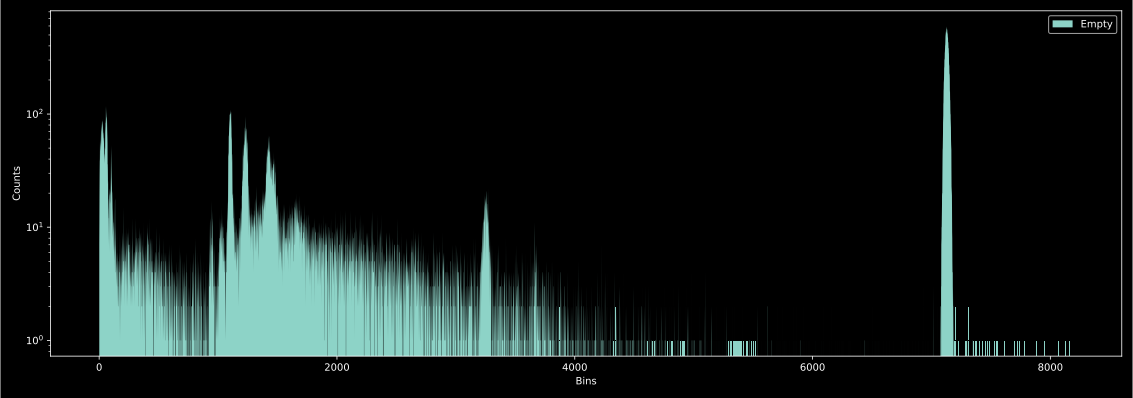

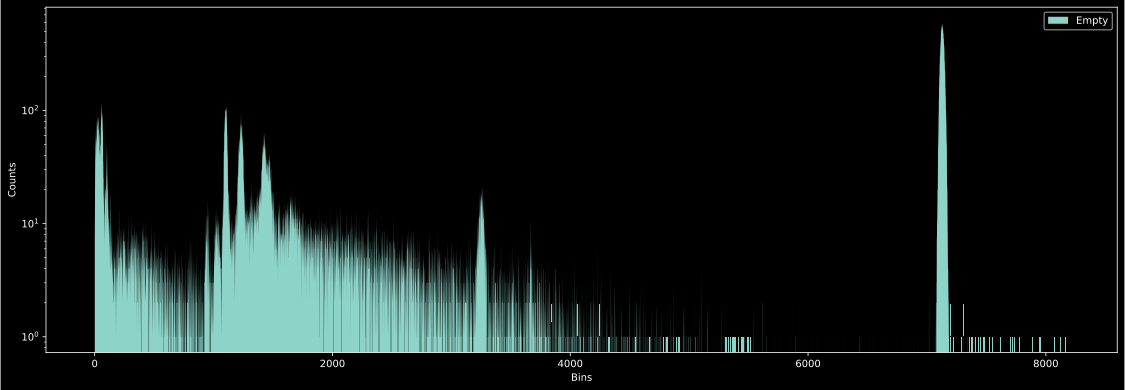

In [7]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
cm = 1/2.54 # inch to cm, metric like brrr
size = 60

titles = [f"nMCA {len(mca)}", "Bins", "Counts"]
fig, ax = plt.subplots(1, 1, figsize=(40*cm, 25*(9/16)*cm))
ax.set(
    # xlim=(-0.01*len(mca), 1.01*len(mca)), ylim=(-0.01*np.max(mca), 1.01 * np.max(mca)),
    xlabel=titles[1], ylabel=titles[2])
    # xticks=[0, len(mca)], yticks=[0, np.max(mca)],)
ax.set_yscale("log")
x = np.arange(0, len(mca), 1)
y = np.vstack([mca])
ax.stackplot(x, y, labels=["Empty"])
ax.legend()
plt.tight_layout()

if not os.path.exists("./tmp/"):
    os.makedirs("./tmp/") 
plt.savefig("./tmp/plot.svg")
plt.savefig("./tmp/plot.png")
SVG("./tmp/plot.svg")

In [ ]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
cm = 1/2.54 # inch to cm, metric like brrr
size = 60

titles = [f"nMCA {len(mca)}", "Bins", "Counts"]
fig, ax = plt.subplots(1, 1, figsize=(40*cm, 25*(9/16)*cm))
ax.set(
    # xlim=(-0.01*len(mca), 1.01*len(mca)), ylim=(-0.01*np.max(mca), 1.01 * np.max(mca)),
    xlabel=titles[1], ylabel=titles[2],
    # xticks=[0, len(mca)], yticks=[0, np.max(mca)],
    title=titles[0])
x = np.arange(0, len(mca), 1)
ax.set_yscale("log")
ax.plot(x, mca, linewidth=.5)
plt.tight_layout()

if not os.path.exists("./tmp/"):
    os.makedirs("./tmp/") 
plt.savefig("./tmp/plot.svg")
plt.savefig("./tmp/plot.png")
SVG("./tmp/plot.svg")

In [ ]:
csvPath = input()
# csvPath = "Pb_XRF"
if not os.path.exists(f"./{csvPath}"):
    os.makedirs(f"./{csvPath}")
os.rename("./tmp/plot.svg", f"./{csvPath}/{csvPath}.svg")
os.rename("./tmp/plot.png", f"./{csvPath}/{csvPath}.png")
with open(f"./{csvPath}/{csvPath}.csv", "x") as f:
    values.to_csv(f, sep=";", index=False)
    mcapd = pd.DataFrame(mca)
    f.write("BEGIN_OF_DATA")
    mcapd.to_csv(f, sep=";")
    f.write("END_OF_DATA")

In [ ]:
plt.style.use("default")
plt.style.use("dark_background")
fig, ax = plt.subplots(1,1)

print(help(ax))